In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import tqdm as tqdm
import matplotlib.pyplot as plt


In [2]:
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=torchvision.transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)


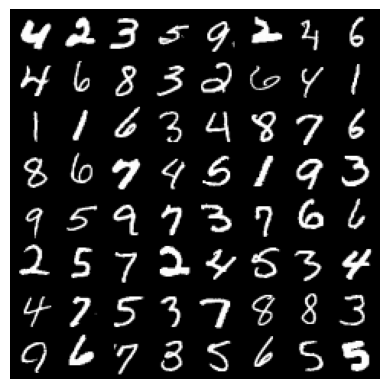

In [6]:
x, y = next(iter(train_loader))

grid = torchvision.utils.make_grid(x, nrow=8)

plt.imshow(grid[0], cmap='gray')
plt.axis('off')
plt.show()


In [8]:
# Dataset of 1 classes
desired_class = 1

# Filter out the desired class
train_dataset.targets = train_dataset.targets == desired_class
train_dataset.data = train_dataset.data[train_dataset.targets]
train_dataset.targets = train_dataset.targets[train_dataset.targets]

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)


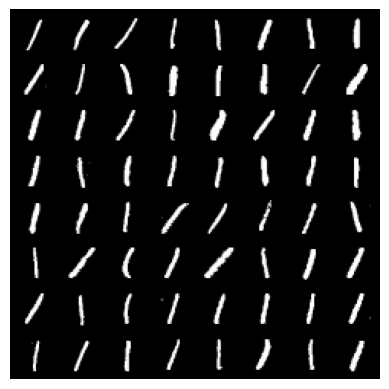

In [9]:
x, y = next(iter(train_loader))

grid = torchvision.utils.make_grid(x, nrow=8)

plt.imshow(grid[0], cmap='gray')
plt.axis('off')
plt.show()


In [13]:
# Pixel rnn
class PixelRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(PixelRNN, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        
    def forward(self, x, h0=None):
        if h0 is None:
            h0 = torch.zeros(1, x.size(0), self.hidden_size)
        x = x.view(x.size(0), -1, 1)
        out, hn = self.rnn(x, h0)
        out = self.fc(out).view(x.size(0), 
        return out, hn


In [14]:
# Training
model = PixelRNN(1, 128, 1)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [15]:
for epoch in range(10):
    for x, y in tqdm.tqdm(train_loader):
        x = x.unsqueeze(2)
        y = y.unsqueeze(1).float()
        
        optimizer.zero_grad()
        out, _ = model(x)
        loss = criterion(out, y)
        loss.backward()
        optimizer.step()
        
    print(f'Epoch {epoch} Loss: {loss.item()}')


  0%|          | 0/106 [00:00<?, ?it/s]


ValueError: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64, 784, 1]))

In [17]:
# Sampling
model.eval()

x = torch.zeros(64, 28, 28, 1)
for i in range(28):
    for j in range(28):
        out, _ = model(x)
        print(out.shape)
        out = torch.sigmoid(out[:, :, i, j])
        x[:, i, j] = torch.bernoulli(out)
        
grid = torchvision.utils.make_grid(x, nrow=8)

plt.imshow(grid[:, :, 0], cmap='gray')
plt.axis('off')
plt.show()


torch.Size([64, 784, 1])


IndexError: too many indices for tensor of dimension 3